# ****`Student Performance`****

!["Student_Performance"](https://www.moultriehealth.org/wp-content/uploads/Student-sitting-at-desk-working_web.jpg)

`**my Student Performance project drives data-driven insights to optimize outcomes. Passionate about shaping impactful solutions in education.** `

## `Main Liberaries`

In [1]:
!pip install sklearn_features

In [2]:
# main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns
import missingno as msn
import warnings
warnings.filterwarnings("ignore")


# data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

# algorithms
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb

# deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

# metrics
from sklearn.metrics import mean_squared_error

## `The Data`

In [3]:
# read the Data
file_path = "/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv"

# Read the csv file if is founded

if os.path.exists(file_path):
    
    df = pd.read_csv(file_path)
    print(df.head())
    
else:
    print("The File does not exist.")

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [4]:
# show the head of the data
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#### Variables:
`Hours Studied`: The total number of hours spent studying by each student.

`Previous Scores`: The scores obtained by students in previous tests.

`Extracurricular` Activities: Whether the student participates in extracurricular activities (Yes or No).

`Sleep Hours`: The average number of hours of sleep the student had per day.

`Sample Question Papers Practiced`: The number of sample question papers the student practiced.

#### Target Variable:

`Performance Index`: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance

In [5]:
# some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
# some describtions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


## `Exploratory Data Analysis (EDA)`

<Axes: >

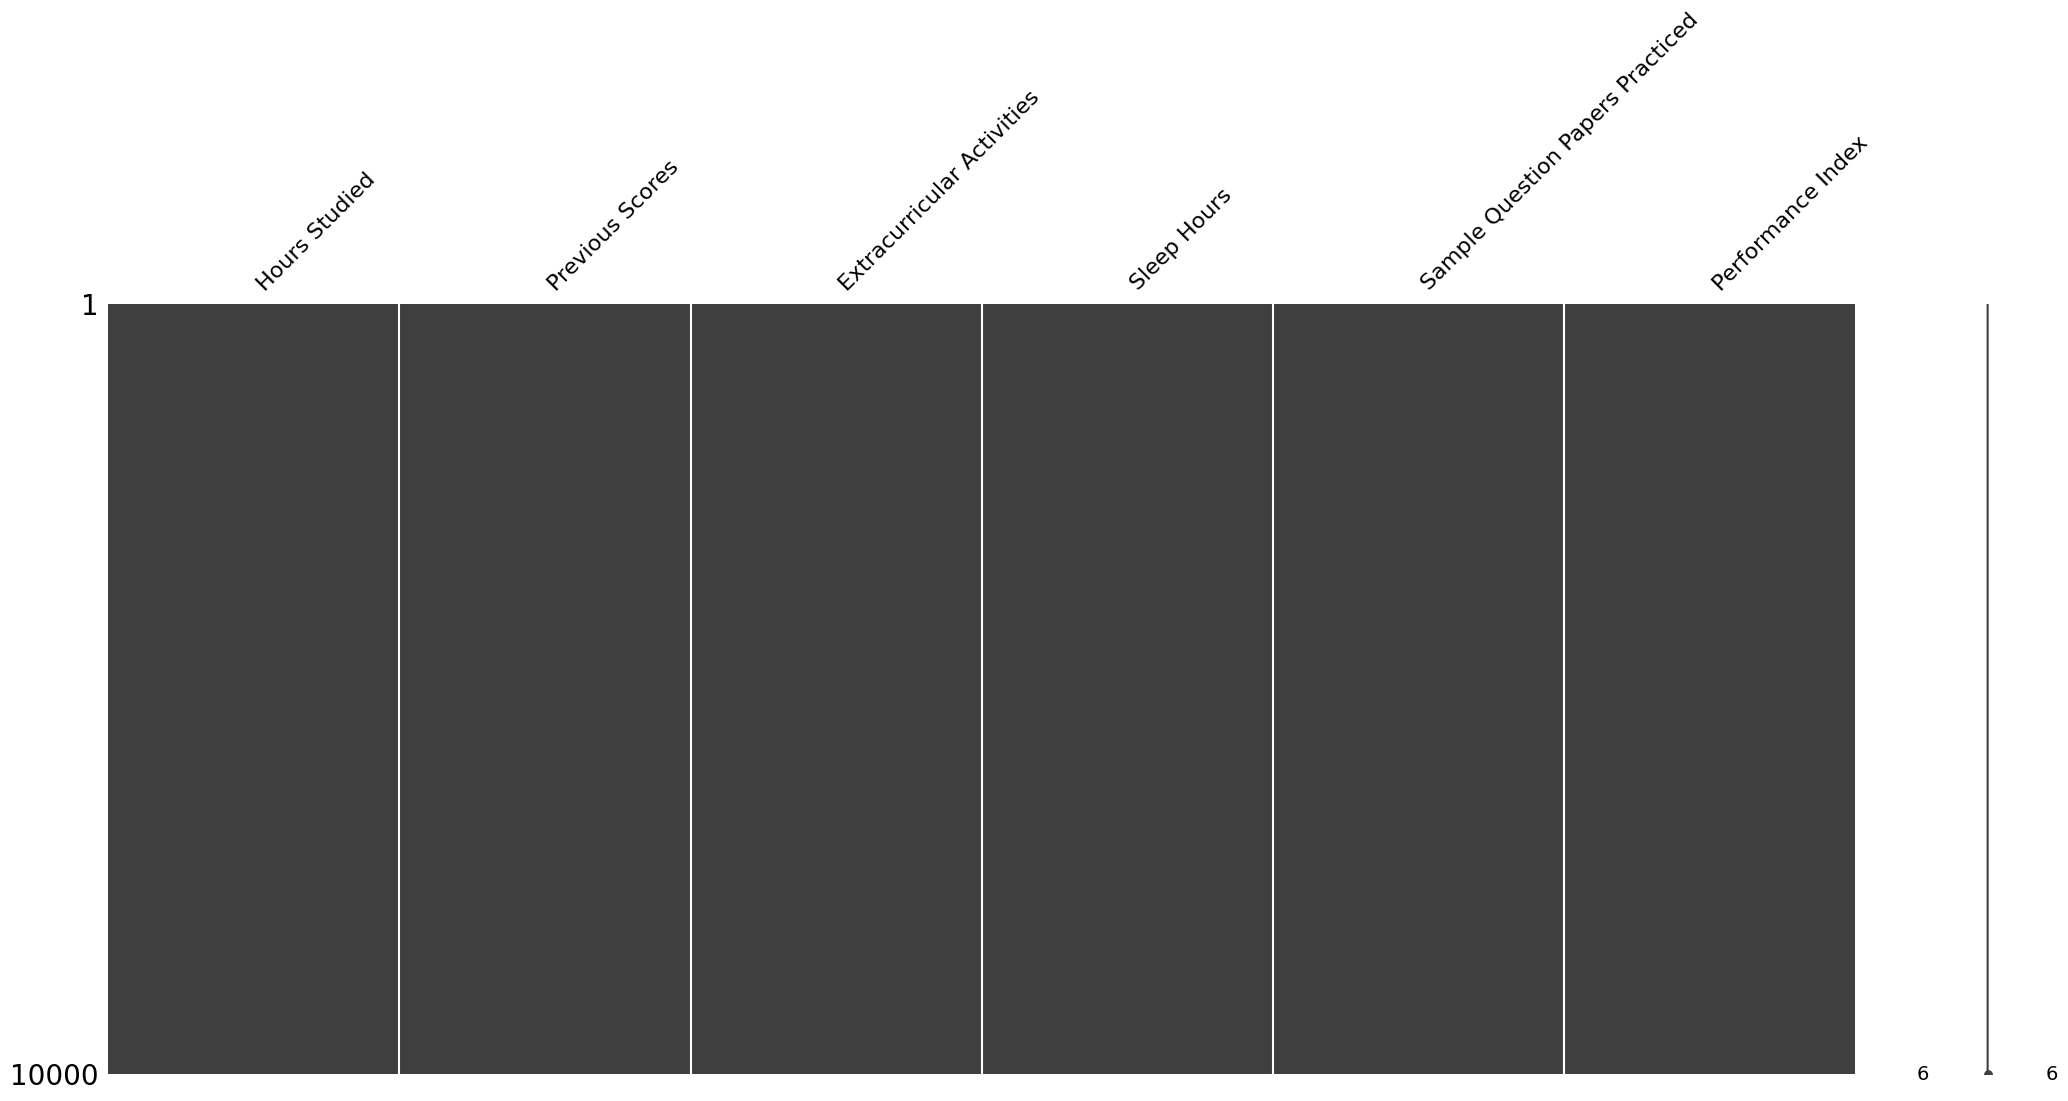

In [7]:
# check the nulls using missingno
msn.matrix(df)

<Axes: >

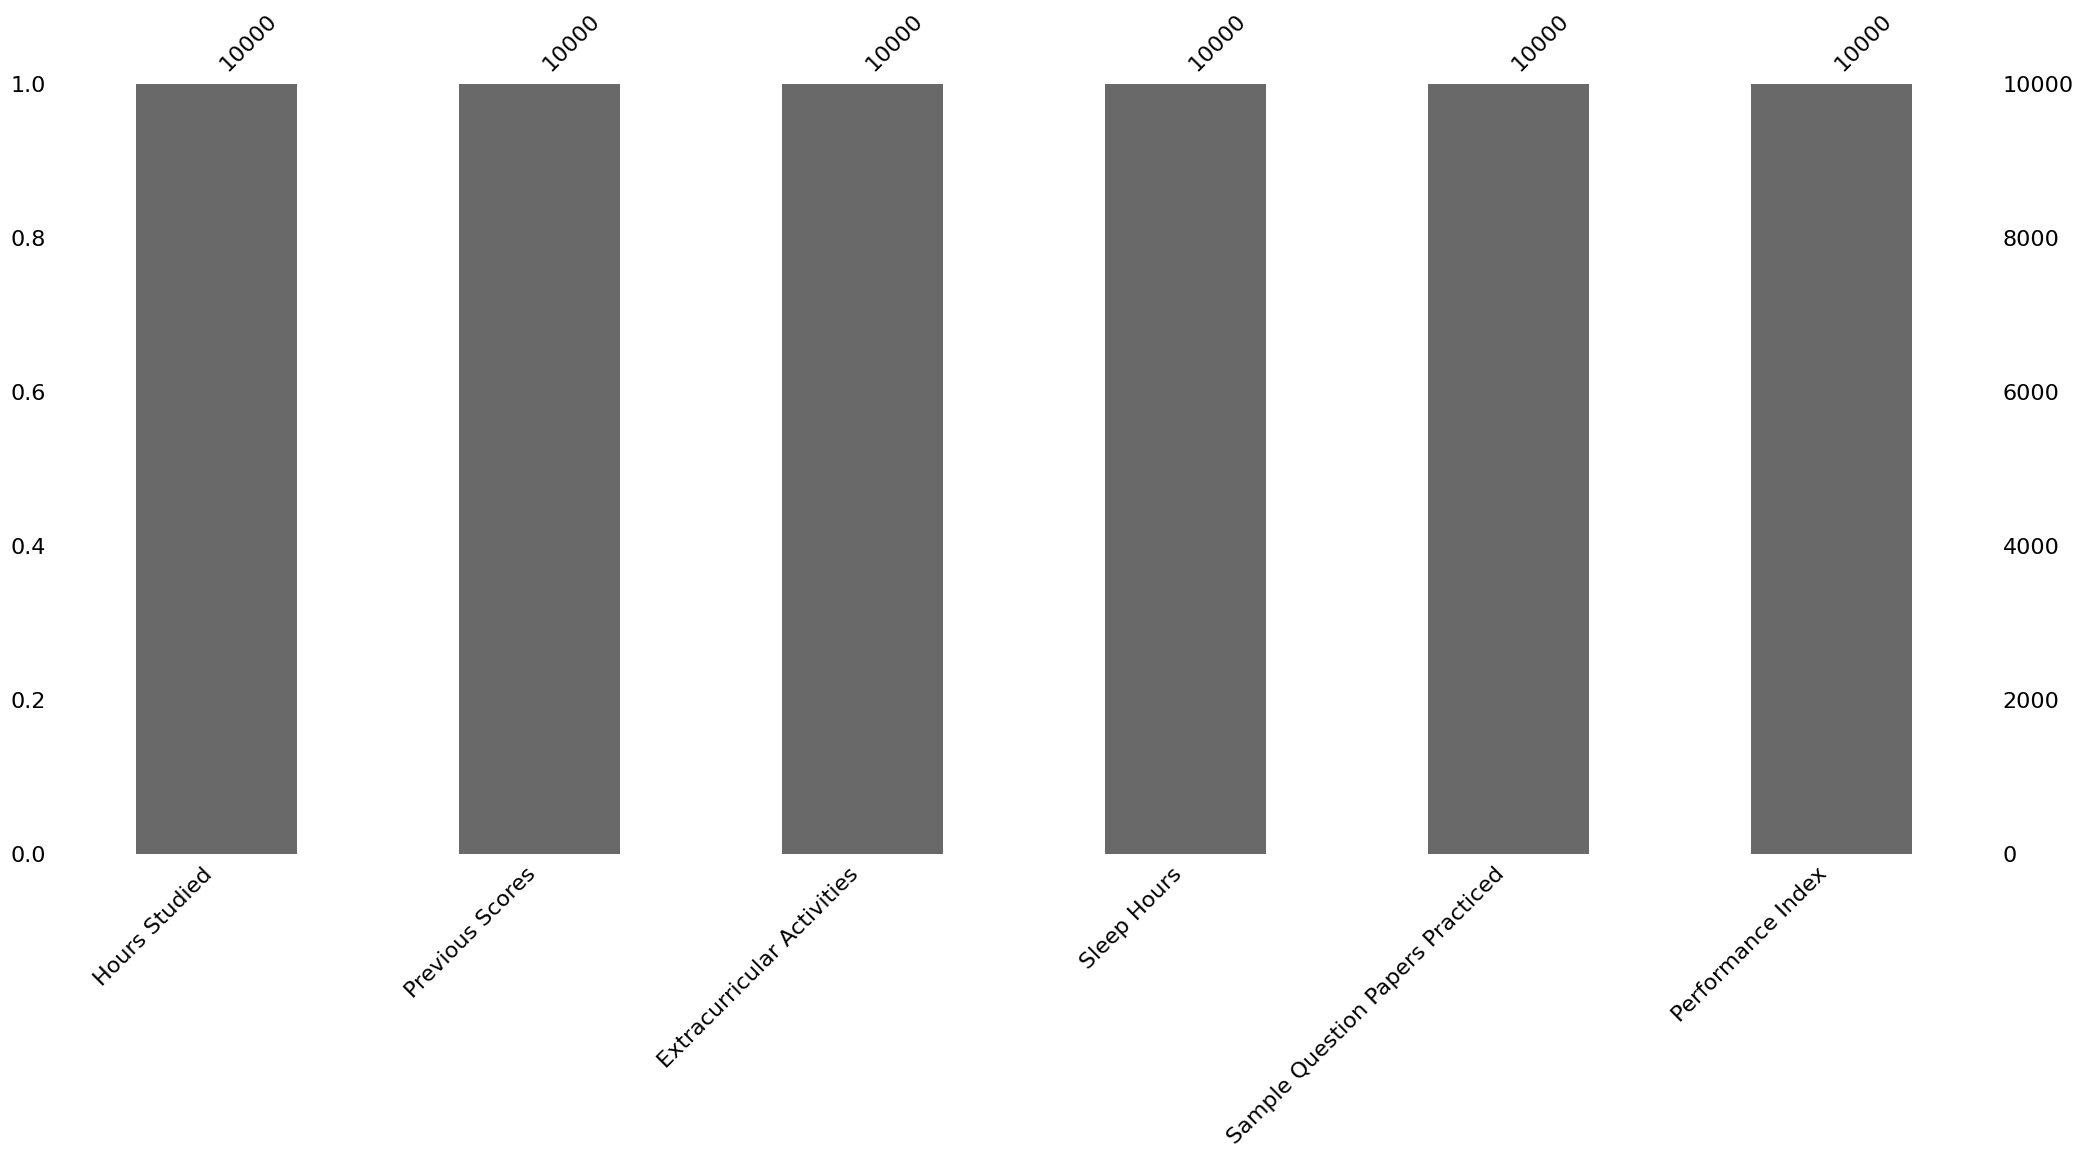

In [8]:
# check the nulls using missingno
msn.bar(df)

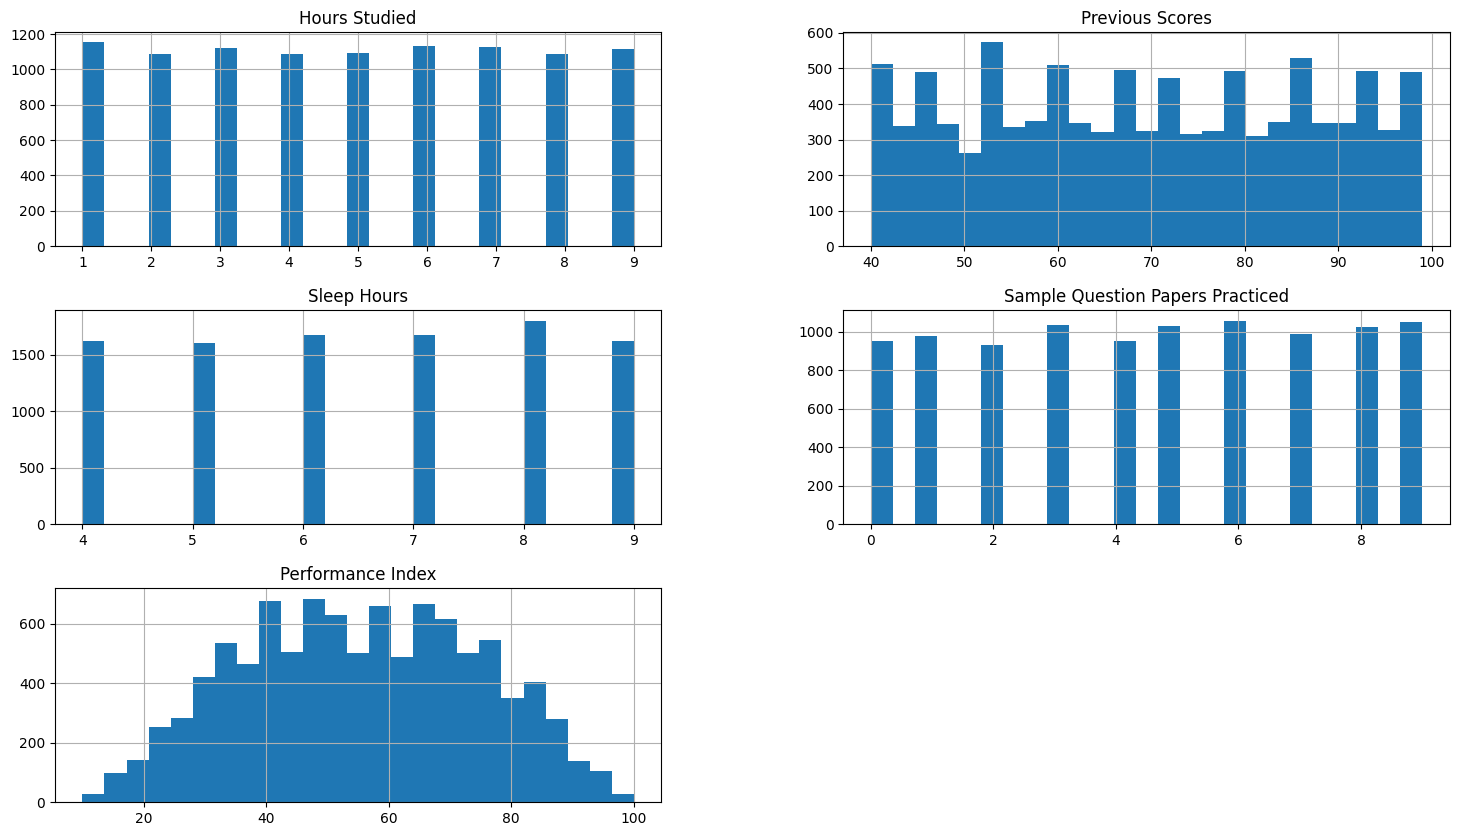

In [9]:
# histograme
df.hist(figsize=(18, 10), bins=25);

In [10]:
# values count
val_count = df["Extracurricular Activities"].value_counts()
val_count

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

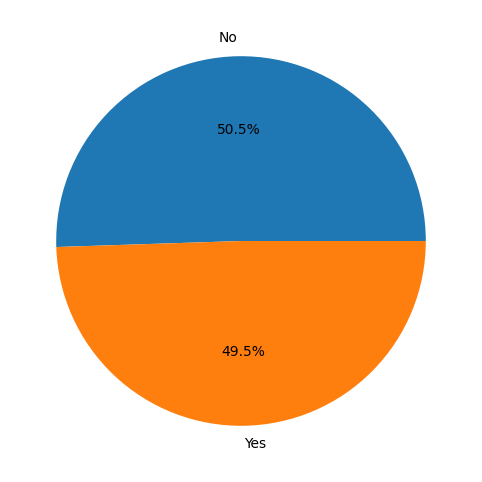

In [11]:
# pie plot
plt.figure(figsize=(10, 6))
plt.pie([val_count[0], val_count[1]], labels=("No", "Yes"), autopct="%1.1f%%")
plt.show()

In [12]:
# scatter matrix
scatter_matrix = px.scatter_matrix(df, dimensions=["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"],
                                  color="Extracurricular Activities", title="Scatter Matrix")

#the size of the figure
scatter_matrix.update_layout(
    width=1000,  
    height=1000, 
)

scatter_matrix.show()

In [13]:
# bar chart
bar_chart = px.bar(df, x="Hours Studied", y="Performance Index", color="Extracurricular Activities",
                   title="Performance Index based on Hours Studied")

bar_chart.update_layout(
    width=1000,   
    height=600,  
)

bar_chart.show()

In [14]:
# Creating a box plot
box_plot = px.box(df, x="Extracurricular Activities", y="Performance Index", color="Extracurricular Activities",
                  title="Performance Index Distribution by Extracurricular Activities")

box_plot.update_layout(
    width=1000,   
    height=600,  
)

box_plot.show()


In [15]:
# Creating a violin plot
violin_plot = px.violin(df, y="Performance Index", box=True, points="all", color="Extracurricular Activities",
                        title="Performance Index Distribution by Extracurricular Activities")

violin_plot.update_layout(
    width=1000,  
    height=600, 
)

violin_plot.show()


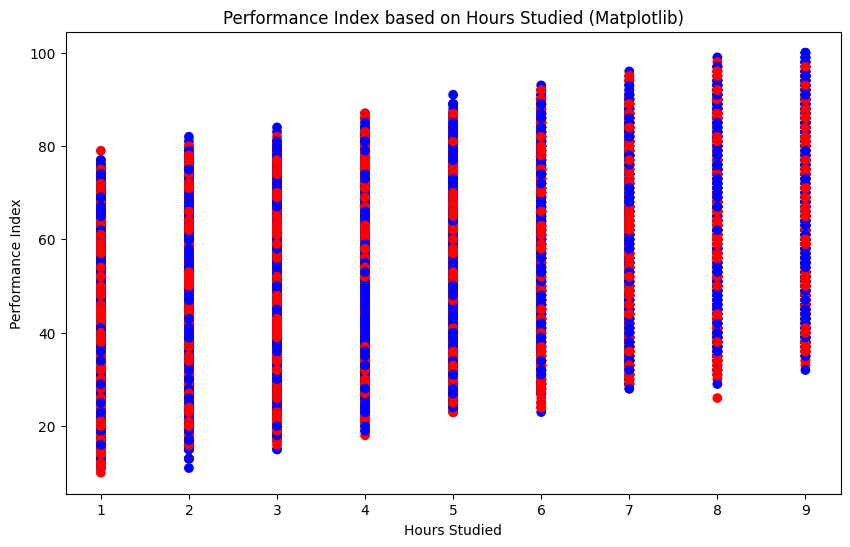

In [16]:
# Scatter plot
plt.figure(figsize=(10, 6))
colors = {'Yes': 'blue', 'No': 'red'}
plt.scatter(df['Hours Studied'], df['Performance Index'], c=df['Extracurricular Activities'].map(colors))
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Performance Index based on Hours Studied (Matplotlib)')
plt.show()

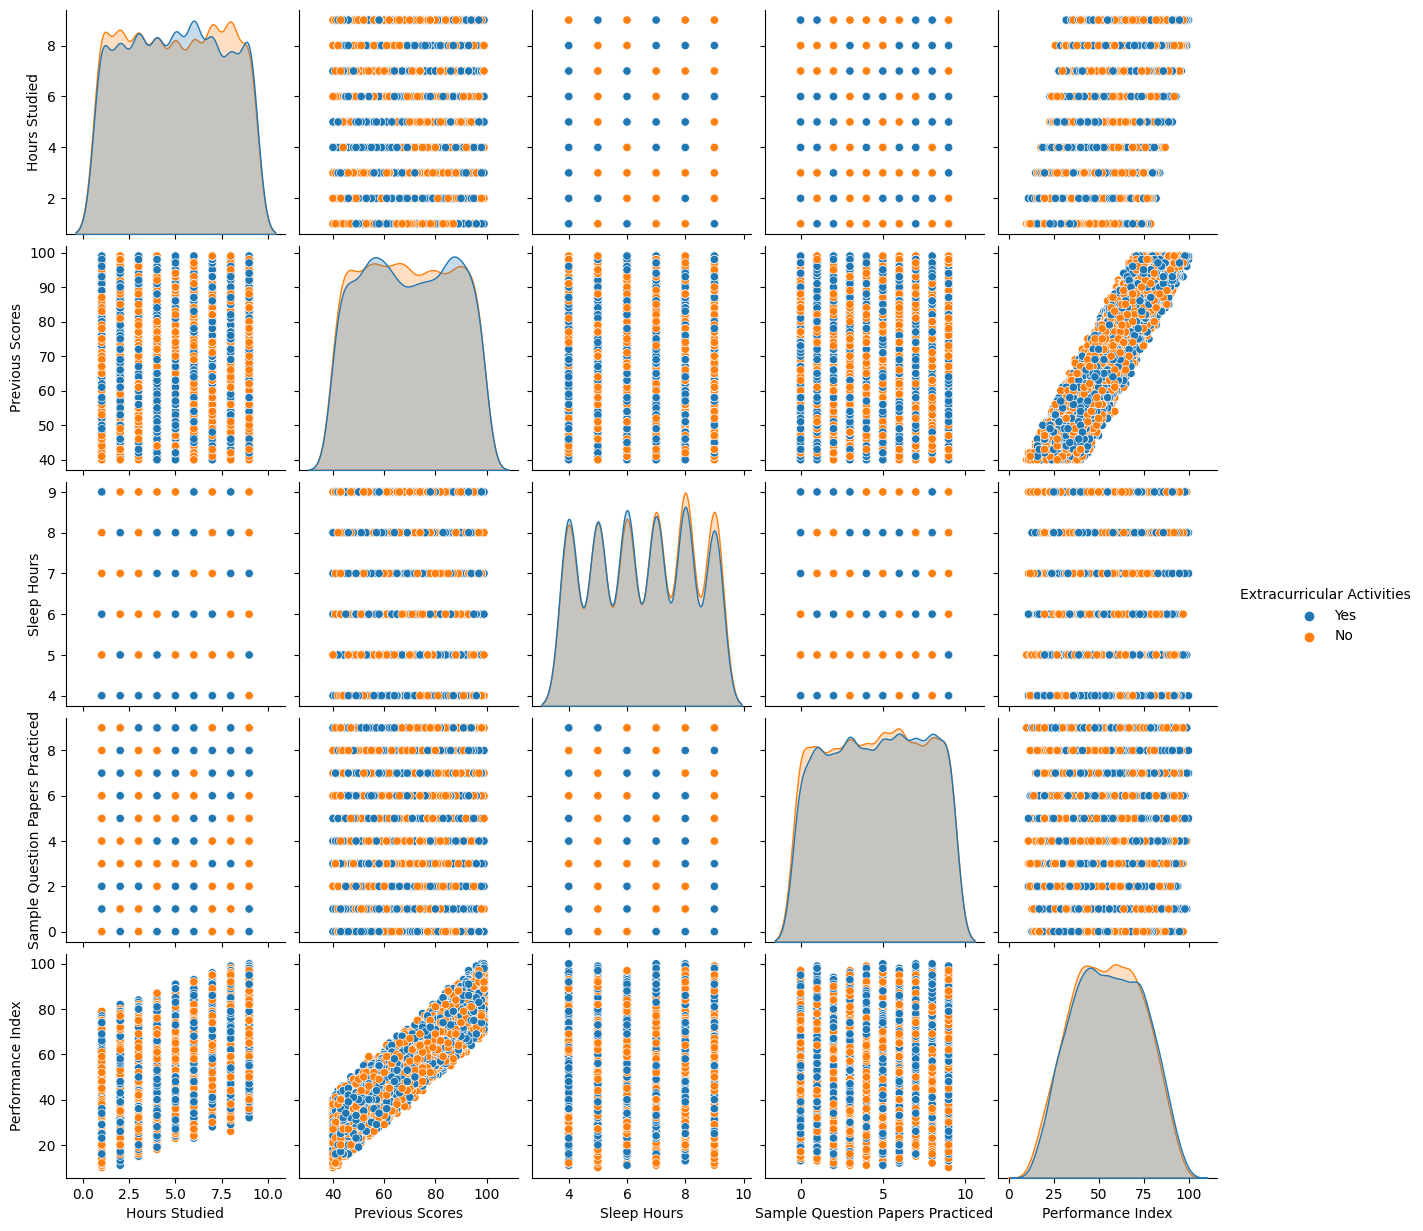

In [17]:
# pairplot
sns.pairplot(data=df, hue="Extracurricular Activities")
plt.show()

## `Data Preprocessing`

In [18]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


### creating a new feature

In [19]:
# Study Efficiency
df['Study Efficiency'] = df['Performance Index'] / df['Hours Studied']
# Practice Intensity
df['Practice Intensity'] = df['Previous Scores'] * df['Sample Question Papers Practiced']

In [20]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Study Efficiency,Practice Intensity
0,7,99,Yes,9,1,91.0,13.000000,99
1,4,82,No,4,2,65.0,16.250000,164
2,8,51,Yes,7,2,45.0,5.625000,102
3,5,52,Yes,5,2,36.0,7.200000,104
4,7,75,No,8,5,66.0,9.428571,375


In [21]:
numeric_columns = [col for col in df.columns if df[col].dtype != object]

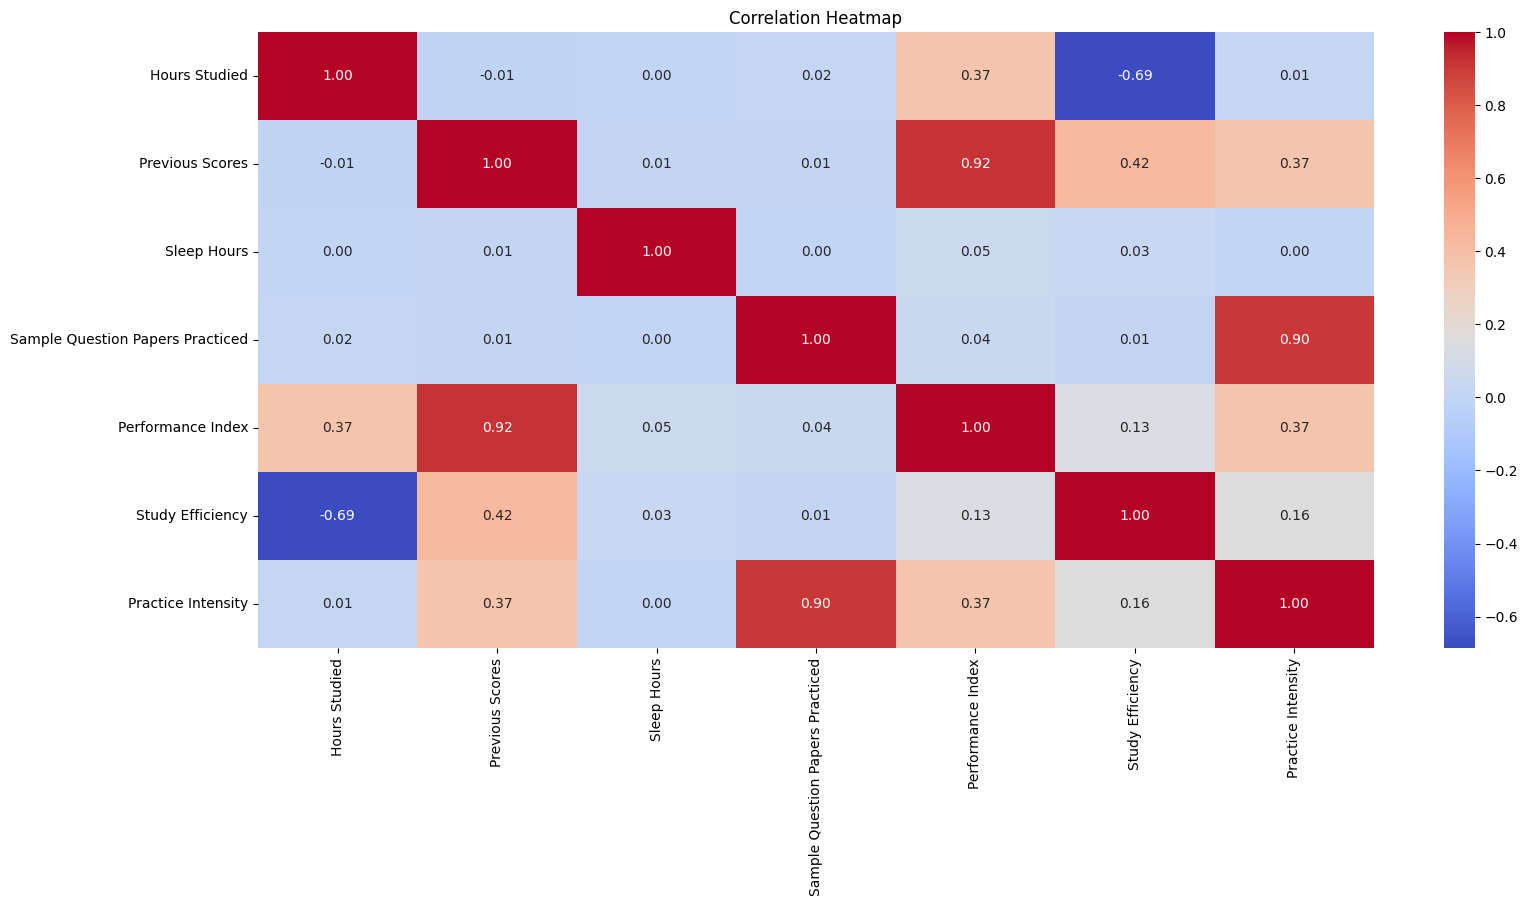

In [22]:
# Correlation heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Split 

In [23]:
X = df.drop(columns=["Performance Index"], axis=1) # Features
y = df["Performance Index"]  # target

In [24]:
# this func to check if there are numeric columns or categorical columns and return them
def check(X):
    
    # numeric columns
    numeric_columns = [col for col in X.columns if X[col].dtype != object]
    
    # categorical columns
    categorical_columns = [col for col in X.columns if X[col].dtype == object]
    
    if numeric_columns and categorical_columns:
        
        return numeric_columns, categorical_columns
    
    elif numeric_columns:
        
        return numeric_columns
    
        
    else:
        return categorical_columns
        
numeric_columns, categorical_columns = check(X)

In [25]:
# numeric columns
numeric_columns

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Study Efficiency',
 'Practice Intensity']

In [26]:
# categorical columns
categorical_columns

['Extracurricular Activities']

### Pipeline

In [27]:
# numerical pipeline to solve the nan and make Standardization
num_pipeline = Pipeline(steps=[
                            ("selector", DataFrameSelector(numeric_columns)), # ==> To select the numeric cols from the Data
                            ("Imputer", SimpleImputer(strategy="median") ),
                            ("Scaler", StandardScaler())
                                ])


# categorical pipeline 
cate_pipeline = Pipeline(steps=[
                 ("selector", DataFrameSelector(categorical_columns)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("Label", OneHotEncoder(sparse=False))
                ])

In [28]:
def Preprocessing(X):
    numeric_columns = [col for col in X.columns if X[col].dtype != object]
    categorical_columns = [col for col in X.columns if X[col].dtype == object]
    if numeric_columns and categorical_columns:
        # Total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[
            ("num_pipeline", num_pipeline),
            ("cate_pipeline", cate_pipeline)
        ])
        # Make fitting
        X_final = total_pipeline.fit_transform(X)
        return X_final

    elif numeric_columns and not categorical_columns:
        # Make fitting
        X_final = num_pipeline.fit_transform(X)
        return X_final

    elif categorical_columns and not numeric_columns:
        # Make fitting for categorical pipeline only
        X_final = cate_pipeline.fit_transform(X[categorical_columns])
        return X_final

    else:
        return "Please provide either numeric_columns, categorical_columns, or both."

X_final = Preprocessing(X)
print(f"X_final is = {X_final}")

X_final is = [[ 0.77518771  1.70417565  1.45620461 ... -0.99574877  0.
   1.        ]
 [-0.38348058  0.72391268 -1.49229423 ... -0.70112534  1.
   0.        ]
 [ 1.16141048 -1.06362569  0.27680507 ... -0.98215076  0.
   1.        ]
 ...
 [ 0.38896495  0.7815752   0.86650484 ...  0.43657435  0.
   1.        ]
 [ 1.54763324  1.5888506   0.27680507 ... -1.44448291  0.
   1.        ]
 [ 0.77518771  0.26261245  0.86650484 ... -1.10906547  1.
   0.        ]]


### Splitting The Data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.30, random_state=42, shuffle=True)

In [30]:
# show the shapes
print(f"the X_train shape is {X_train.shape}")
print(f"the y_train shape is {y_train.shape}")
print(f"the X_test shape is {X_test.shape}")
print(f"the y_test shape is {y_test.shape}")

the X_train shape is (7000, 8)
the y_train shape is (7000,)
the X_test shape is (3000, 8)
the y_test shape is (3000,)


## `The Model & Hyperparameters Tunning`

### AdaBoostRegressor

In [31]:
AdaBoost = AdaBoostRegressor()

params = {
    "n_estimators":[i for i in range(50, 200, 30)],
    "learning_rate":np.arange(0.1, 1, 0.2),
    "loss":['linear', 'square', 'exponential']
}

Grid_search = GridSearchCV(AdaBoost, param_grid=params, scoring="neg_mean_squared_error",
                           n_jobs=-1, cv=5, verbose=0)

# fitting
Grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9]),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 80, 110, 140, 170]},
             scoring='neg_mean_squared_error')

In [32]:
# show the best parameters
Grid_search.best_params_

{'learning_rate': 0.9000000000000001, 'loss': 'square', 'n_estimators': 170}

In [33]:
# make the model 
AdaBoost_model = Grid_search.best_estimator_

In [34]:
# make croos validation
croos_val = cross_val_score(estimator=AdaBoost_model, X=X_train, y=y_train,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the errors is ==> {np.sqrt((croos_val)*-1)}")

# show the mean for the scores
print(f"the mean to the errors is ==> {np.sqrt((croos_val.mean())*-1)}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=AdaBoost_model, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the RMSE is {np.sqrt(mean_squared_error(y_train, croos_val_pred))}")

the errors is ==> [2.62526095 2.52089473 2.71914718 2.72108982 2.62047389]
the mean to the errors is ==> 2.6424185864385454
****************************************************************************************************
the RMSE is 2.630433593994853


In [35]:
# show the feature importance 
importance = AdaBoost_model.feature_importances_
importance

array([0.17857827, 0.80072562, 0.00301579, 0.        , 0.01183212,
       0.00494338, 0.00090483, 0.        ])

In [36]:
# prediction
y_pred_ِAda = AdaBoost_model.predict(X_train)

In [37]:
pd.DataFrame(np.c_[y_pred_ِAda, y_train], columns=["prediction", "Actual"])

,prediction,Actual
0,80.776808,82.0
1,79.079701,79.0
2,50.605863,50.0
3,81.754564,81.0
4,52.754320,52.0
...,...,...
6995,43.192575,48.0
6996,51.155626,51.0
6997,41.906475,44.0
6998,25.044209,20.0


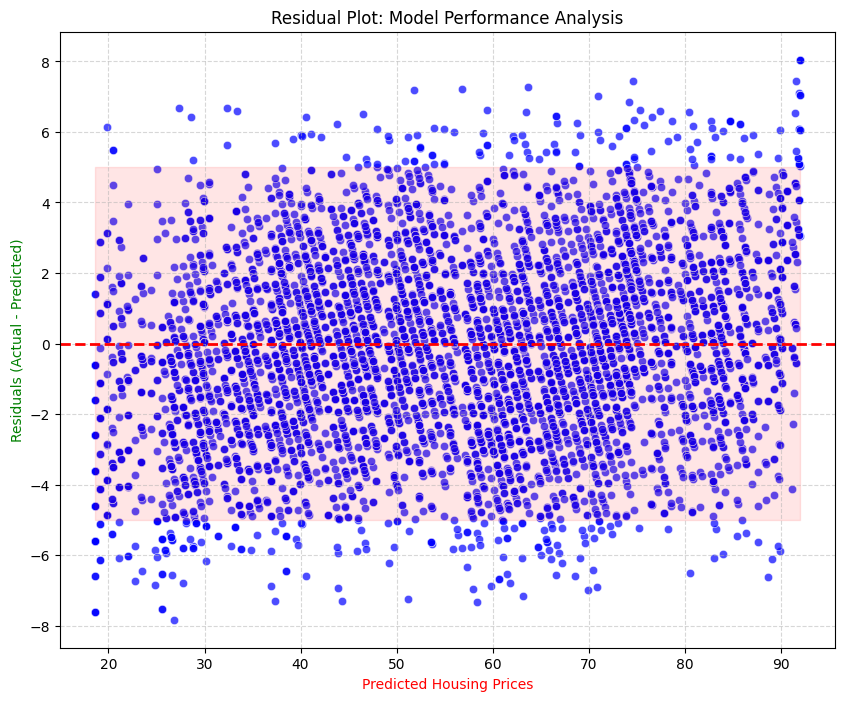

In [38]:
# Calculate residuals
residuals = y_train - y_pred_ِAda

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_ِAda, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and annotations
plt.title('Residual Plot: Model Performance Analysis')
plt.xlabel('Predicted Housing Prices', color="r")
plt.ylabel('Residuals (Actual - Predicted)',color="g")
plt.grid(True, linestyle='--', alpha=0.5)

# Highlighting the zero residual line
plt.fill_between([min(y_pred_ِAda), max(y_pred_ِAda)], 5, -5, color='red', alpha=0.1)

plt.show()

### RandomForestRegressor

In [39]:
Random_forest = RandomForestRegressor()

params = {
    "n_estimators":[i for i in range(50, 200, 30)],
    "max_depth":np.arange(2, 10, 2),
}

Grid_search = GridSearchCV(Random_forest, param_grid=params, scoring="neg_mean_squared_error",
                           n_jobs=-1, cv=5, verbose=0)

# fitting
Grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': [50, 80, 110, 140, 170]},
             scoring='neg_mean_squared_error')

In [40]:
# show the best parameters
Grid_search.best_params_

{'max_depth': 8, 'n_estimators': 170}

In [41]:
# make the model 
Randomforest_model = Grid_search.best_estimator_

In [42]:
# make croos validation
croos_val = cross_val_score(estimator=Randomforest_model, X=X_train, y=y_train,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the errors is ==> {np.sqrt((croos_val)*-1)}")

# show the mean for the scores
print(f"the mean to the errors is ==> {np.sqrt((croos_val.mean())*-1)}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=Randomforest_model, X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the RMSE is {np.sqrt(mean_squared_error(y_train, croos_val_pred))}")

the errors is ==> [1.59999607 1.46641605 1.56313557 1.54061806 1.52417752]
the mean to the errors is ==> 1.5395049451477623
****************************************************************************************************
the RMSE is 1.5359710818964172


In [43]:
# show the feature importance 
importance = Randomforest_model.feature_importances_
importance

array([1.39951286e-01, 8.46272481e-01, 3.81710553e-04, 5.13006928e-05,
       1.29227985e-02, 4.01056326e-04, 1.08261862e-05, 8.54005224e-06])

In [44]:
# prediction
y_pred_ِRand = Randomforest_model.predict(X_train)

In [45]:
pd.DataFrame(np.c_[y_pred_ِRand, y_train], columns=["prediction", "Actual"])

,prediction,Actual
0,81.887454,82.0
1,79.140327,79.0
2,50.158494,50.0
3,80.989274,81.0
4,52.138418,52.0
...,...,...
6995,47.444829,48.0
6996,51.571386,51.0
6997,44.299480,44.0
6998,21.415397,20.0


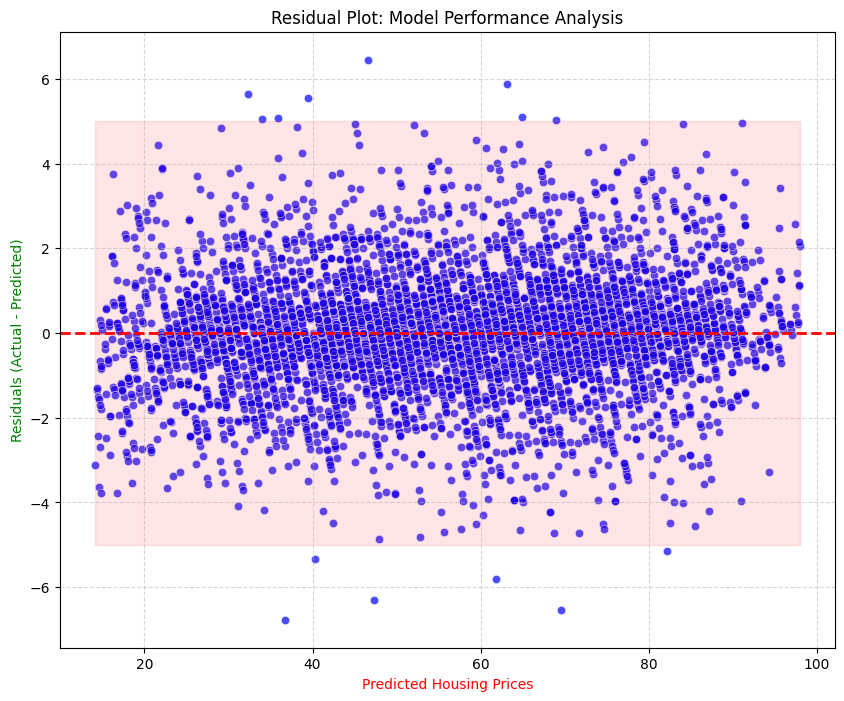

In [46]:
# Calculate residuals
residuals = y_train - y_pred_ِRand

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_ِRand, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and annotations
plt.title('Residual Plot: Model Performance Analysis')
plt.xlabel('Predicted Housing Prices', color="r")
plt.ylabel('Residuals (Actual - Predicted)',color="g")
plt.grid(True, linestyle='--', alpha=0.5)

# Highlighting the zero residual line
plt.fill_between([min(y_pred_ِRand), max(y_pred_ِRand)], 5, -5, color='red', alpha=0.1)

plt.show()

### XGBoost

In [47]:
Xgb_reg= xgb.XGBRegressor()

params = {
    "n_estimators" : np.arange(50, 200, 10),
    "max_depth" : np.arange(2, 10, 1),
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "subsample" : np.arange(0.2, 1, 0.25),
    "alpha" :  np.arange(0.1, 1, 0.1)
}

Grid_search = RandomizedSearchCV(estimator=Xgb_reg, param_distributions=params, n_jobs=-1,
                                  cv=5, scoring="neg_mean_squared_error", n_iter=500)


# fitting
Grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.2 , 0.45, 0.7 , 0.95])},
                   scoring='neg_mean_squared_error')

In [48]:
# show the best params
Grid_search.best_params_

{'subsample': 0.95,
 'n_estimators': 190,
 'max_depth': 9,
 'learning_rate': 0.2,
 'alpha': 0.1}

In [49]:
# the final model
Xgb_reg_final = Grid_search.best_estimator_

In [50]:
# make croos validation
croos_val = cross_val_score(estimator=Xgb_reg_final, X=X_train, y=y_train,
                            cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
# print the croos val for every fold
print(f"the errors is ==> {np.sqrt((croos_val)*-1)}")

# show the mean for the scores
print(f"the mean to the errors is ==> {np.sqrt((croos_val.mean())*-1)}")

print("**"*50)

# make croos validation to predict
croos_val_pred = cross_val_predict(estimator=Xgb_reg_final , X=X_train, y=y_train, 
                                   cv=5, method="predict", n_jobs=-1 )


# show the mean sqared error
print(f"the RMSE is {np.sqrt(mean_squared_error(y_train, croos_val_pred))}")

the errors is ==> [0.75692894 0.68080592 0.68003568 0.66595522 0.65067324]
the mean to the errors is ==> 0.6878602543600638
****************************************************************************************************
the RMSE is 0.6878602543600638


In [51]:
# show the feature importance 
importance = Xgb_reg_final.feature_importances_
importance

array([2.5918785e-01, 7.3210597e-01, 5.7948858e-04, 2.4358851e-04,
       7.3740580e-03, 3.2735805e-04, 1.8163299e-04, 0.0000000e+00],
      dtype=float32)

In [52]:
# prediction
y_pred_ِxgb = Xgb_reg_final.predict(X_train)

In [53]:
pd.DataFrame(np.c_[y_pred_ِxgb, y_train], columns=["prediction", "Actual"])


,prediction,Actual
0,82.041878,82.0
1,79.010681,79.0
2,49.939129,50.0
3,80.943008,81.0
4,52.079952,52.0
...,...,...
6995,47.959061,48.0
6996,50.987995,51.0
6997,43.998188,44.0
6998,20.004045,20.0


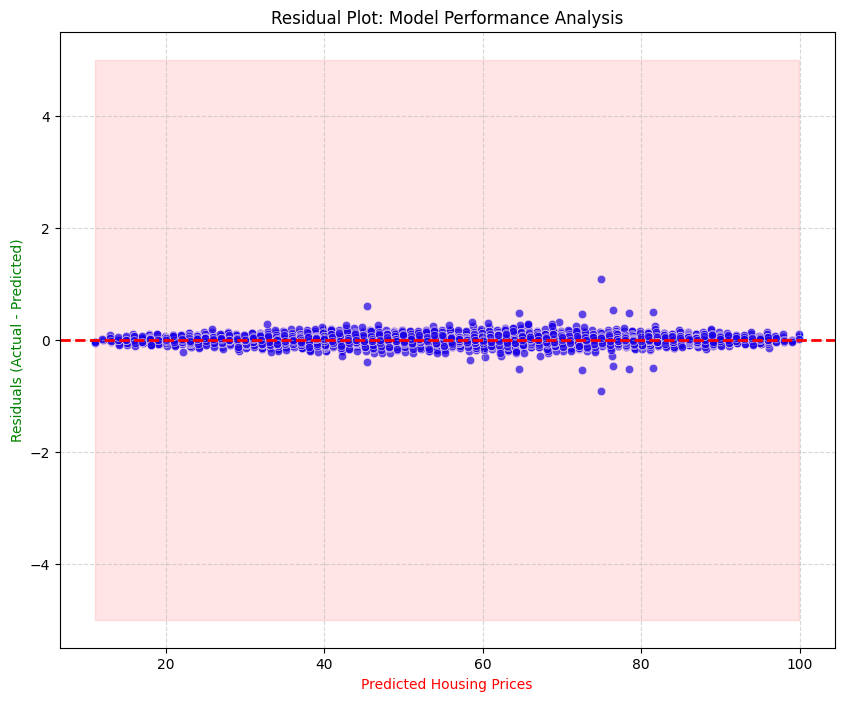

In [54]:
# Calculate residuals
residuals = y_train - y_pred_ِxgb

# Residual Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_pred_ِxgb, y=residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Labels and annotations
plt.title('Residual Plot: Model Performance Analysis')
plt.xlabel('Predicted Housing Prices', color="r")
plt.ylabel('Residuals (Actual - Predicted)',color="g")
plt.grid(True, linestyle='--', alpha=0.5)

# Highlighting the zero residual line
plt.fill_between([min(y_pred_ِxgb), max(y_pred_ِxgb)], 5, -5, color='red', alpha=0.1)

plt.show()

### Comparison Between Models

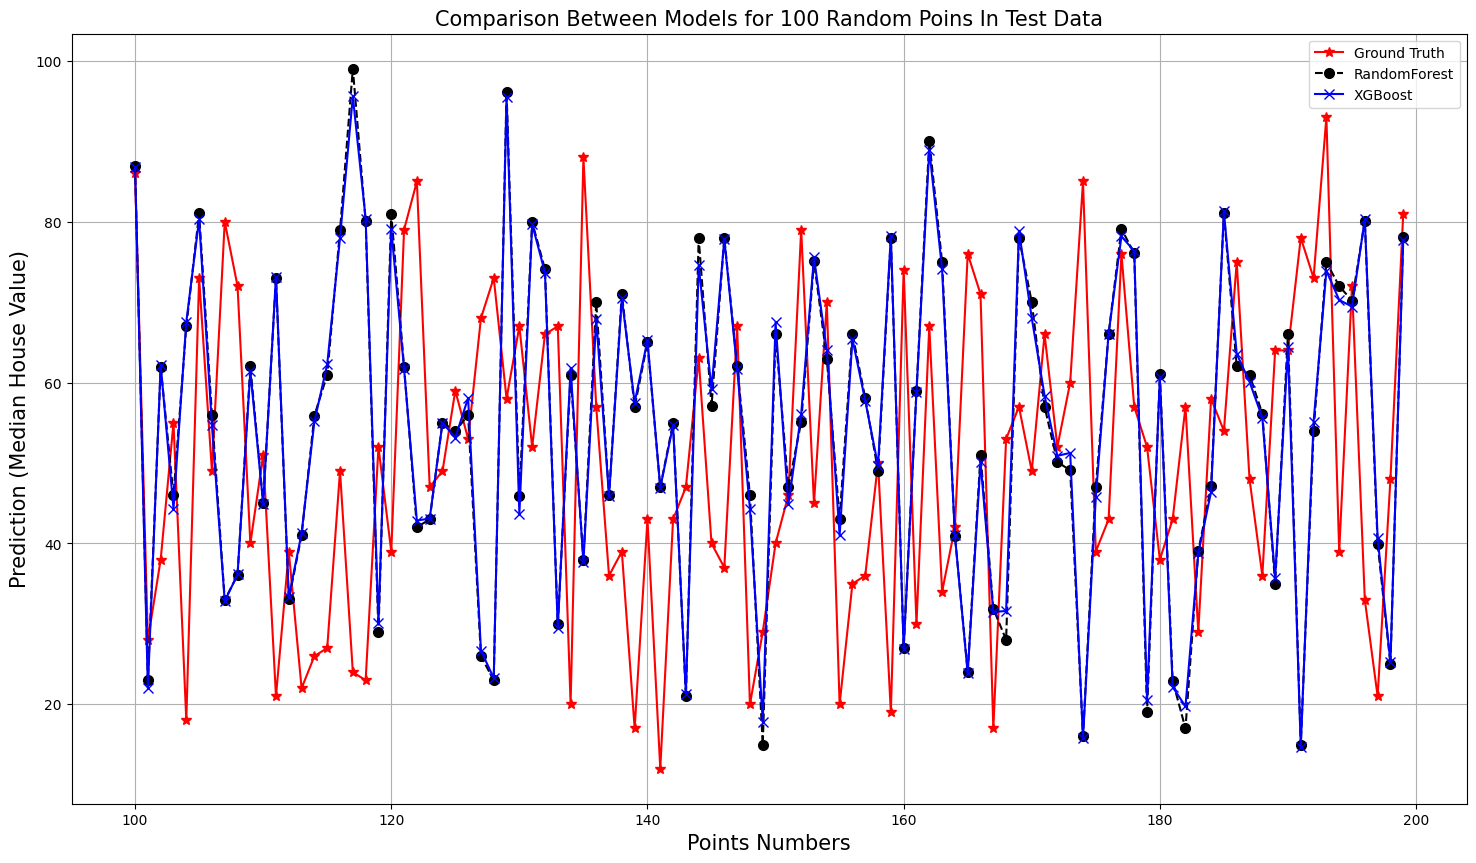

In [55]:
# X_axis numbers
x_x = np.arange(100, 200)

#plotting
plt.figure(figsize=(18, 10))
plt.plot(x_x, y_test.values[100:200], 'r*-', markersize=7, label="Ground Truth")
plt.plot(x_x, y_pred_ِxgb[100:200], 'ko--', markersize=7, label="RandomForest")
plt.plot(x_x, y_pred_ِRand[100:200], 'bx-', markersize=7, label="XGBoost")
plt.title("Comparison Between Models for 100 Random Poins In Test Data", fontsize=15, color="k")
plt.xlabel("Points Numbers", fontsize=15, color="k")
plt.ylabel("Prediction (Median House Value)", fontsize=15, color="k")
plt.legend()
plt.grid(True)
plt.show()

## `Deep Learning model`

In [56]:
# Creating the neural network model with dropout and early stopping
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  
model.add(Dense(1)) 

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Adding early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/20
219/219 [==============================] - 2s 4ms/step - loss: 808.2220 - mse: 808.2220 - val_loss: 32.4809 - val_mse: 32.4809
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 90.3611 - mse: 90.3611 - val_loss: 16.4992 - val_mse: 16.4992
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 77.0586 - mse: 77.0586 - val_loss: 9.8080 - val_mse: 9.8080
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 69.8473 - mse: 69.8473 - val_loss: 11.7301 - val_mse: 11.7301
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 69.6894 - mse: 69.6894 - val_loss: 7.2252 - val_mse: 7.2252
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 66.4254 - mse: 66.4254 - val_loss: 6.4862 - val_mse: 6.4862
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 66.6914 - mse: 66.6914 - val_loss: 5.4017 - val_mse: 5.4017
Epoch 8/20
219/219 [==============================] - 

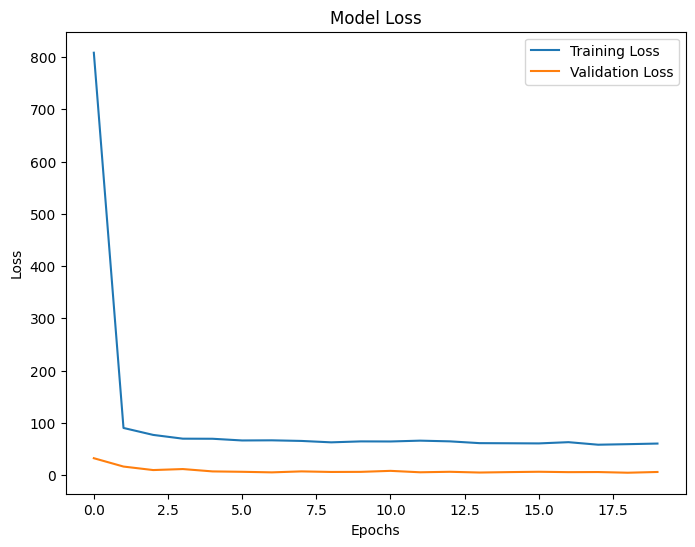

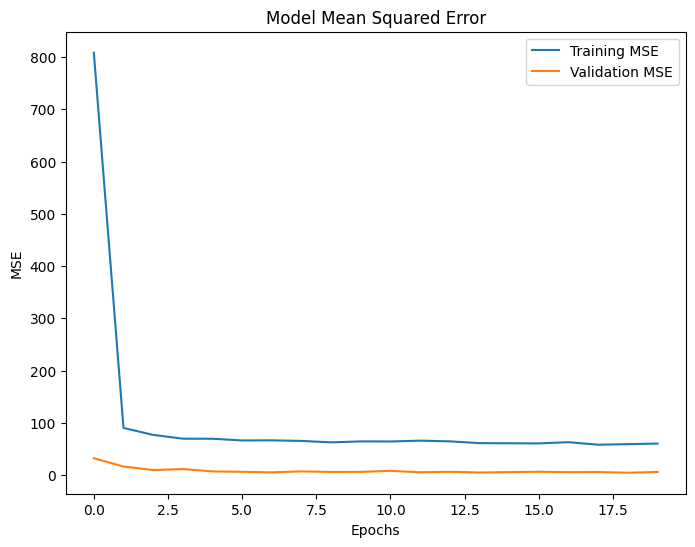

In [57]:
# Visualization: Plotting training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualization: Plotting training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [58]:
# Evaluating the model
loss, rmse = model.evaluate(X_test, y_test, verbose=0)
print(f"RMSE on Test Data: {np.sqrt(rmse)}")
print(f"loss on Test Data: {loss}")

RMSE on Test Data: 2.4770721007515664
loss on Test Data: 6.135886192321777


In [59]:
# prediction by deep learning model on train
y_pred_deep_test = model.predict(X_test)
y_pred_deep_test

94/94 [==============================] - 0s 2ms/step


array([[53.356792],
       [21.160103],
       [47.406773],
       ...,
       [32.330795],
       [66.40722 ],
       [30.36788 ]], dtype=float32)

In [60]:
pd.DataFrame(np.c_[y_pred_deep_test, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,53.356792,51.0
1,21.160103,20.0
2,47.406773,46.0
3,31.033398,28.0
4,42.639862,41.0
...,...,...
2995,31.937788,32.0
2996,37.157063,40.0
2997,32.330795,33.0
2998,66.407219,69.0


### `we founded that XGBoost is the best so we will use it to predict on X_test`

In [61]:
# prediction
y_pred_XGB = Xgb_reg_final.predict(X_test)

In [62]:
# RMSE
print("The RMSE:")
np.sqrt(mean_squared_error(y_test, y_pred_XGB))

The RMSE:


0.5848803523701825

In [63]:
pd.DataFrame(np.c_[y_pred_XGB, y_test], columns=["prediction", "Actual"])

,prediction,Actual
0,52.002022,51.0
1,20.003540,20.0
2,45.786232,46.0
3,27.994370,28.0
4,41.144886,41.0
...,...,...
2995,31.925411,32.0
2996,39.972355,40.0
2997,32.896702,33.0
2998,69.545280,69.0


## `By: Mohammed Hamza`